# Project for Applied Statistics#

<b>Name: Preneeth O<br>
Batch: 12</b>

## Introduction##

Finding valueable insights from insurance data. Need to perform Exploratory Data Analysis & Hypothesis 
testing on the given dataset.

Dataset: <a href=https://olympus.greatlearning.in/courses/6624/modules/items/223592>insurance.csv</a>



### Step 1: Import the necessary libraries ###

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

sns.set(color_codes = True)

### Step 2: Read the data as a data frame ###

In [3]:
insData = pd.read_csv("insurance.csv")
insData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 3-a: Shape of the data###

In [4]:
insData.shape

(1338, 7)

<b>Findings:</b> There are 7 columns and 1338 rows of data

### Step 3-b: Data type of each attribute###

In [5]:
insData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


<b>Findings:</b> Age - Integer; Sex - String; bmi - float; children - integer; smoker - string; region - string; charges - float

### Step 3-c: Checking the presence of missing values###

From step 3-b we can say that there are no null in any of the columns.



In [6]:
insData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>Findings:</b> Above check confirms that there are no missing values in the dataframe

### Step 3-d: 5 point summary of numerical attributes###

In [7]:
#insData.describe()

In [8]:
#Function to print the Min, Q1, Q2, Q3 & Max values of a given numeric column

def fivePointSummary(column): 
    print ("{} Min = {:.2f} ".format(column.name,  column.min()))
    print ("{} Q1 = {:.2f} ".format(column.name,  column.quantile(0.25)))  
    print ("{} Q2 = {:.2f} ".format(column.name,  column.median()))
    print ("{} Q3 = {:.2f} ".format(column.name,  column.quantile(0.75)))  
    print ("{} Max = {:.2f} ".format(column.name,  column.max()))
    #box = plt.boxplot(column,vert=0,patch_artist=True)
    box = plt.boxplot(column,0,'gD')
    #sns.boxplot(data = column)
    #plt.title('BMI of females with 0, 1, 2 children')

    
    


age Min = 18.00 
age Q1 = 27.00 
age Q2 = 39.00 
age Q3 = 51.00 
age Max = 64.00 


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

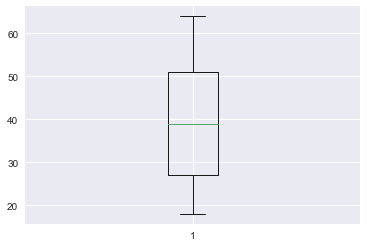

In [39]:
fivePointSummary(insData.age)
insData.age.describe()

<b>Findings:</b> Age seems to be symetrcial plot. The data is equally distributed across median.

bmi Min = 15.96 
bmi Q1 = 26.30 
bmi Q2 = 30.40 
bmi Q3 = 34.69 
bmi Max = 53.13 


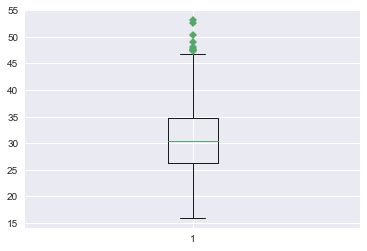

In [10]:
fivePointSummary(insData.bmi)

<b>Findings:</b>BMI seems to be symetrcial plot. The data is equally distributed across median and there are quite a few outliers.

children Min = 0.00 
children Q1 = 0.00 
children Q2 = 1.00 
children Q3 = 2.00 
children Max = 5.00 


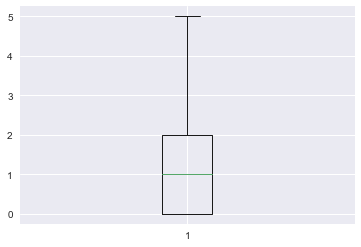

In [11]:
fivePointSummary(insData.children)

<b>Findings:</b> Childern distribution is right skewed. No outliers.

charges Min = 1121.87 
charges Q1 = 4740.29 
charges Q2 = 9382.03 
charges Q3 = 16639.91 
charges Max = 63770.43 


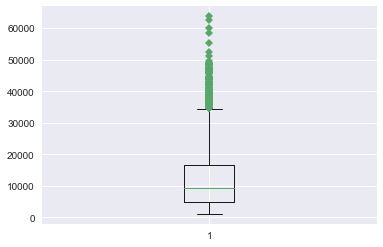

In [12]:
fivePointSummary(insData.charges)

<b>Findings:</b> Charges distribution is also right skewed and lot of outliers.

### Step 3-e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.###

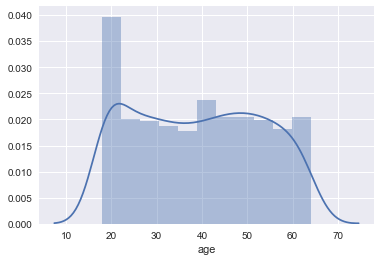

In [13]:
sns.distplot(insData.age)
# normality test
#stat1, p1 = shapiro(insData.age)
#print('Statistics=%.3f, p=%.3f' % (stat1, p1))

<b>Findings:</b> The age distribution is Non-symmetric, bimodal distribution.

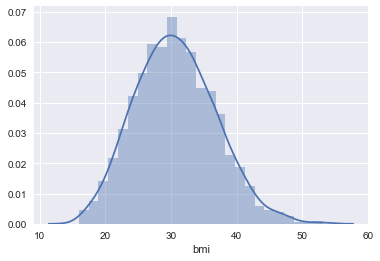

In [14]:
sns.distplot(insData.bmi)

# normality test
#stat, p = shapiro(insData.bmi)
#print('Statistics=%.3f, p=%.3f' % (stat, p))

<b>Findings:</b> The bmi distribution is looks symmetric and unimodal distribution.

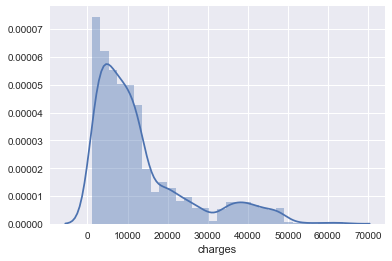

In [15]:
sns.distplot(insData.charges)
# normality test
#stat, p = shapiro(insData.charges)
#print('Statistics=%.3f, p=%.10f' % (stat, p))

<b>Findings:</b> The charges distribution is +ve skewed and unimodal distribution.

### Step 3-f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.###

In [16]:
#Find the skewness of bmi

print ("The skewness of bmi is {:.2f}".format(insData.bmi.skew()))


The skewness of bmi is 0.28


<b>Findings:</b> The the BMI is skewness is +0.28 which is > 0 that means it is Positively skewed.

In [17]:
#Find the skewness of age


print ("The skewness of age is {:.2f}".format(insData.age.skew()))

The skewness of age is 0.06


<b>Findings:</b> The the Age is skewness is +0.06 which is > 0 that means it is Positively skewed.

In [18]:
#Find the skewness of charges


print ("The skewness of charges is {:.2f}".format(insData.charges.skew()))

The skewness of charges is 1.52


<b>Findings:</b> The the charges is skewness is +1.52 which is > 0 that means it is Positively skewed.

#function to calculate skewness of given series of data
def findSkewness (column): 
    median = column.median()
    mean = column.mean()
    sd = column.std()
    skew = 3*(mean - median)/sd
    
    #print ("Median {:.2f} Mean {:.2f}".format(median, mean))
    return skew

#print ("The skewness of charges is {:.2f}".format(findSkewness(insData.charges)))
#print ("The skewness of age is {:.2f}".format(findSkewness(insData.age)))
#print ("The skewness of bmi is {:.2f}".format(findSkewness(insData.bmi)))

### Step 3-g: Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns.###

In [19]:
#function to find outliers

def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    np.set_printoptions(precision=3)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    return np.array(anomalies)

In [20]:
#Find outliers in bmi

print (findOutliers(insData.bmi))

[ 49.06  48.07  47.52  47.41  50.38  47.6   52.58  47.74  53.13]


<b>Findings:</b> The above are outliers in bmi data. Used the logic of finding outliers by using IQR

In [21]:
#Find outliers in charges
print(findOutliers(insData.charges))

[ 39611.76  36837.47  37701.88  38711.    35585.58  51194.56  39774.28
  48173.36  38709.18  37742.58  47496.49  37165.16  39836.52  43578.94
  47291.06  47055.53  39556.49  40720.55  36950.26  36149.48  48824.45
  43753.34  37133.9   34779.62  38511.63  35160.13  47305.3   44260.75
  41097.16  43921.18  36219.41  46151.12  42856.84  48549.18  47896.79
  42112.24  38746.36  42124.52  34838.87  35491.64  42760.5   47928.03
  48517.56  41919.1   36085.22  38126.25  42303.69  46889.26  46599.11
  39125.33  37079.37  35147.53  48885.14  36197.7   38245.59  48675.52
  63770.43  45863.2   39983.43  45702.02  58571.07  43943.88  39241.44
  42969.85  40182.25  34617.84  42983.46  42560.43  40003.33  45710.21
  46200.99  46130.53  40103.89  34806.47  40273.65  44400.41  40932.43
  40419.02  36189.1   44585.46  43254.42  36307.8   38792.69  55135.4
  43813.87  39597.41  36021.01  45008.96  37270.15  42111.66  40974.16
  46113.51  46255.11  44202.65  48673.56  35069.37  39047.29  47462.89
  38998

<b>Findings:</b> The above are outliers in charges data.  Used the logic of finding outliers by using IQR

In [22]:
#Find outliers in charges
print(findOutliers(insData.age))


[]


<b>Findings:</b> There no outliers in age data

### Step 3-g: Distribution of categorical columns (include children).###

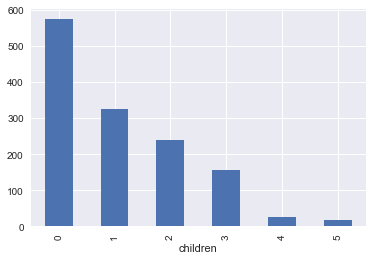

In [23]:
insData.groupby('children').size().plot(kind='bar')

<b>Findings:</b> Zero children is highest

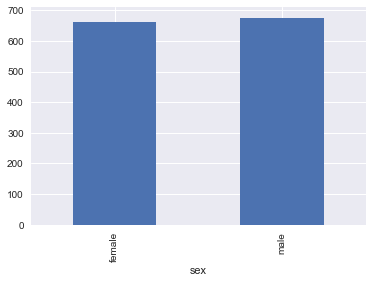

In [24]:
insData.groupby('sex').size().plot(kind='bar')


<b>Findings:</b> Males are more than females

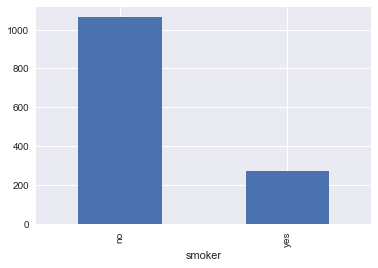

In [25]:
insData.groupby('smoker').size().plot(kind='bar')


<b>Findings:</b> Non smokers are  more than smokers

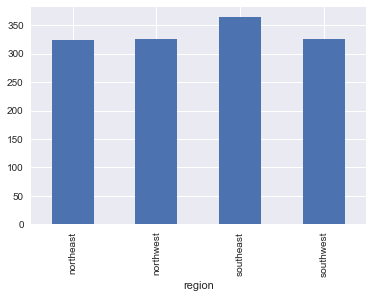

In [26]:
chart = insData.groupby('region').size().plot(kind='bar')



<b>Findings:</b> Southeast region has max number of insurance

### Step 3-i: Pair plot that includes all the columns of the dataframe.###

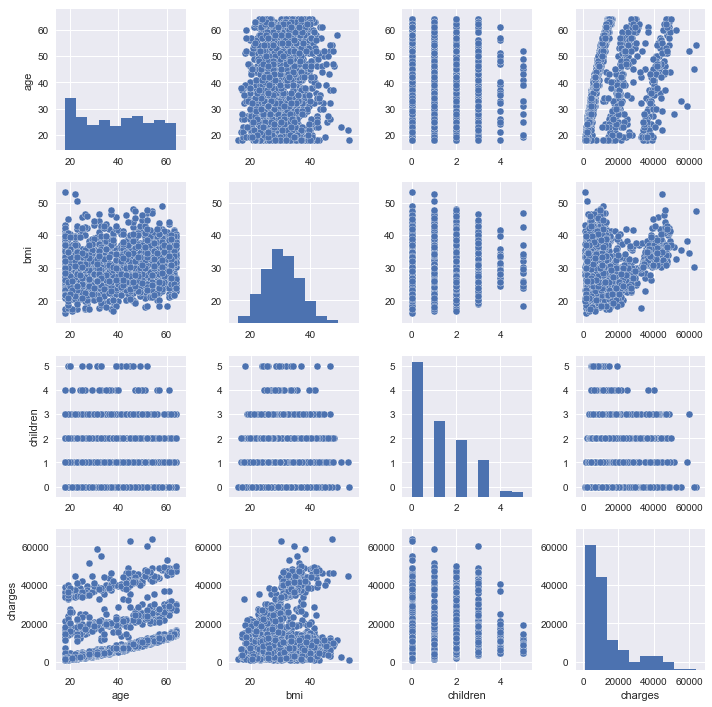

In [27]:
sns.pairplot(insData)

<b>Findings:</b> Age, bmi, children and charges are uncorelated data

## Hypothesis Testing##

### 4a: Do charges of people who smoke differ significantly from the people who don't?.###

Test whether the means of two independent samples are significantly different using 2-sample t-test.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

<b>$H_0$:</b>  Mean of charges on smokers is <b>equal to</b> Mean of charges on non-somker. --> $\mu1$ = $\mu2$<br>
<b>$H_A$: </b>  Mean of charges on smokers is <b>not equal</b> to Mean of charges on non-somker --> $\mu1$ <> $\mu2$

<p> Here $\mu1$, $\mu2$ are mean of insurance charges of smokers  and non-smokers respectively <br>

<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. Since it is 2 tailed, singnificance level will be 2.5% on both sides. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we are comparing 2 independent sample variable, hence will go with <b>2-sample t-test</b>

<b>Step-4: Compute the random chance of probability.</b>

In [28]:
#get the data into 2 groups
grp_smokers = insData.query('smoker == "yes"')['charges']
grp_nonsmokers = insData.query('smoker == "no"')['charges']
#print ("Smokers = {}, Non Smokers = {}".format(grp_smokers.mean(), grp_nonsmokers.mean()))

#2-Sample t-test 
t_statistic, p_value = ttest_ind(grp_smokers, grp_nonsmokers)
#t_statistic, p_value = ttest_ind(grp_nonsmokers, grp_smokers)
print("t_statistic = {:.2f}; p_value = {:.4f}".format(t_statistic, p_value))

t_statistic = 46.66; p_value = 0.0000


<b>Step-4 : Make Decision</b>
<br> The probability (p_value = 0.0000) is less than 0.025 significance level, so we will <b>Reject the Null hypothesis.</b> 

#### Which implies that the insurance charges vary significantly for smokers and non-smokers ####



### 4b: Does bmi of males differ significantly from that of female.###


<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

$H_0$: Mean of bmi of males is equal to Mean of bmi of females. --> $\mu1$ = $\mu2$  <br>
$H_A$: Mean of bmi of males is not equal to Mean of bmi of females --> $\mu1$ <> $\mu2$

<p> Here $\mu1$, $\mu2$ are mean of bmi of male and female respectively <br>

<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. Since it is 2 tailed, singnificance level will be 2.5% on both sides. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we are comparing 2 independent sample variable, hence will go with <b>2-sample t-test</b>

<b>Step-4: Compute the random chance of probability.</b>

In [29]:
#get the data into 2 groups
bmi_male = insData.query('sex == "male"')['bmi']
bmi_female = insData.query('sex == "female"')['bmi']

print("male bmi mean = {:.2f}; female bmi mean = {:.4f}".format(bmi_male.mean(), bmi_female.mean()))

#2-Sample t-test 
t_statistic, p_value = ttest_ind(bmi_female, bmi_male)
print("t_statistic = {:.2f}; p_value = {:.4f}".format(t_statistic, p_value))

male bmi mean = 30.94; female bmi mean = 30.3777
t_statistic = -1.70; p_value = 0.0900


<b>Step-4 : Make Decision</b>
<br> The probability (p_value = 0.0900) is greater than 0.025 significance level hence does not fall in the critcial region, so we will <b>Fail to reject Null hypothesis.</b> 

#### So BMI of male and females does not differ significantly ####


### 4c: Is the proportion of smokers significantly differentin different genders?###

Test whether the proportions of smokers are significantly different for genders.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

$H_0$: Proportion of smokers in male & female are equal<br>
$H_A$: Proportion of smokers in male & female are significantly different


<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>.

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we have 2 categorical variable (sex and smoker) and  Analysis of proprotion of smokers w.r.t sex needs to be done.Hence the test method to be used is <b>two proportions z-test</b>

<p><b>Step-4: Compute the random chance of probability.</b>

In [30]:
fsmokers = insData[insData['sex'] == 'female'].smoker.value_counts()[1]  
msmokers = insData[insData['sex'] == 'male'].smoker.value_counts()[1] 
noOffemales = insData.sex.value_counts()[1] 
noOfmales = insData.sex.value_counts()[0] 

print("fsmokers = {:.2f}; msmokers = {:.4f}".format(fsmokers, msmokers))
print("females = {:.2f}; males = {:.4f}".format(noOffemales, noOfmales))

stat, pval = proportions_ztest([fsmokers, msmokers] , [noOffemales, noOfmales])
print("t_statistic = {:.2f}; p_value = {:.4f}".format(stat, pval))

fsmokers = 115.00; msmokers = 159.0000
females = 662.00; males = 676.0000
t_statistic = -2.79; p_value = 0.0053


<b>Step-5 : Make Decision</b>
<br> The p_value (0.0053) is less than 0.05 significance level hence it falls in the critcial region, so we will <b>Reject Null hypothesis.</b> 

#### So there is enough evidence to state that proportion of smokers significantly varies in male & females ####


### 4d: Is the distribution of bmi across women with no children, one child and two children, the same ?###

In [31]:
insData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
#Get the bmi values of females with 0, 1, 2 children in different arrays.
bmi_zerochild = insData.query('sex == "female" & children == 0')['bmi']
bmi_onechild = insData.query('sex == "female" & children == 1')['bmi']
bmi_twochild = insData.query('sex == "female" & children == 2')['bmi']

print ("Zero child count = {} mean bmi = {:.2f}".format(len(bmi_zerochild), bmi_zerochild.mean()))
print ("One child count = {} mean bmi = {:.2f}".format(len(bmi_onechild), bmi_onechild.mean()))
print ("Two child count = {} mean bmi = {:.2f}".format(len(bmi_twochild), bmi_twochild.mean()))

#create a dataframe to hold all 3 above created arrays
mean_bmi_df = pd.DataFrame()

#format the data in required format for testing
df0 = pd.DataFrame({'Children': '0', 'BMI':bmi_zerochild})
df1 = pd.DataFrame({'Children': '1', 'BMI':bmi_onechild})
df2 = pd.DataFrame({'Children': '2', 'BMI':bmi_twochild})

mean_bmi_df = mean_bmi_df.append(df0).append(df1).append(df2) 
#mean_bmi_df

Zero child count = 289 mean bmi = 30.36
One child count = 158 mean bmi = 30.05
Two child count = 119 mean bmi = 30.65


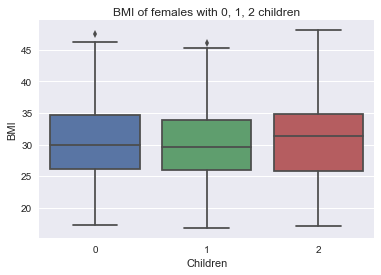

In [33]:
sns.boxplot(x = "Children", y = "BMI", data = mean_bmi_df)
plt.title('BMI of females with 0, 1, 2 children')
plt.show()

Test whether distribution of bmi across women with no children, one child and two children, the vary using One Way Anova test.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean bmi of females with 0,1, 2 children.<br><br>
<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means. The test method is <b>One Way Anova test</b>

<b>Step-4: Compute the random chance of probability using ANOVA table.</b>

In [34]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ Children', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


<b>Step-5 : Make Decision</b>

In this example, p value is 0.715858 and it is greater than our chosen level of signifance at 5%

So the statistical decision is to <b>fail to reject null hypothesis</b> at 5% level of significance.

#### So we fail to reject that females  with 0, 1, 2 children have same bmi ####